In [6]:
import numpy as np
import netCDF4 as ncdf
import matplotlib as mlab
import matplotlib.pyplot as plt
import xarray as xr
import glob as glob
import os as os
import sys as sys
from filter.RaymondFilters import RaymondFilter6, RaymondFilter10
#from filter import raymond2d_lowpass as RaymondFilter6

# These are 45 vertical levels that the FV3 puts out - use them here to map ARW to that grid for comparison

plevels = np.asarray([100000.,  97500.,  95000.,  92500.,  90000.,  87500.,  85000.,  82500.,
                       80000.,  77500.,  75000.,  72500.,  70000.,  67500.,  65000.,  62500.,
                       60000.,  57500.,  55000.,  52500.,  50000.,  47500.,  45000.,  42500.,
                       40000.,  37500.,  35000.,  32500.,  30000.,  27500.,  25000.,  22500.,
                       20000.,  17500.,  15000.,  12500.,  10000.,   7000.,   5000.,   3000.,
                        2000.,   1000.,    700.,    500.,    200.])
nz_new = plevels.shape[0]

vmin = -10.
vmax = 20.

clevels = np.linspace(vmin, vmax, 21)
print(clevels)

klevel = 25
plevel = plevels[klevel]

utc = 21

def title_string(time, pres, label, wmax, wmin, eps=None):
    if eps:
        return ("%2.2i UTC %s at Pres=%3.0f mb with EPS=%5.1f \n Wmax: %3.1f        Wmin: %4.2f" % (time, label, pres/100., eps, wmax, wmin))
    else:
        return ("%2.2i UTC %s at Pres=%3.0f mb \n Wmax: %3.1f        Wmin: %4.2f" % (time, label, pres/100., wmax, wmin))

[-10.   -8.5  -7.   -5.5  -4.   -2.5  -1.    0.5   2.    3.5   5.    6.5
   8.    9.5  11.   12.5  14.   15.5  17.   18.5  20. ]


In [7]:
f = xr.open_dataset(("/Users/Louis.Wicker/04May2021_HRRR/region.20210504_conus_hrrr.t00z.wrfnatf%2.2i.nc4" % utc))


g = xr.open_dataset("/Users/Louis.Wicker/04May2021_RRFS/mem1/region.t00z.mem01.naf%3.3i.nc4" % utc)



In [8]:
fw_tmp = np.nan_to_num((f.W.values).astype('float64'))
fw_tmp2 = np.zeros_like(fw_tmp)

f.variables['W'][...] = np.nan_to_num(f.W)

gw_tmp = np.nan_to_num((g.W.values).astype('float64'))
gw_tmp2 = np.zeros_like(gw_tmp)

g.variables['W'][...] = np.nan_to_num(g.W)


In [11]:
eps = 10000.

for k in np.arange(klevel-1,klevel+1):
    # fw_tmp2[k] = RaymondFilter6(fw_tmp[k].transpose(),eps).transpose()
    fw_tmp2[k] = RaymondFilter10(fw_tmp[k],eps)
    
fw_tmp2 = f.W.copy(data=(fw_tmp-fw_tmp2))

#

for k in np.arange(klevel-2,klevel+2):
    # gw_tmp2[k] = RaymondFilter6(gw_tmp[k].transpose(),eps).transpose()
    gw_tmp2[k] = RaymondFilter10(gw_tmp[k],eps)

gw_tmp2 = g.W.copy(data=(gw_tmp-gw_tmp2))


RaymondFilter10 called:  Shape of array:  NY: 434  NX:  523
I-loop 0.2817 seconds
J-loop 0.2388 seconds
RaymondFilter10 called:  Shape of array:  NY: 434  NX:  523
I-loop 0.2065 seconds
J-loop 0.2401 seconds
RaymondFilter10 called:  Shape of array:  NY: 556  NX:  641
I-loop 0.3353 seconds
J-loop 0.4071 seconds
RaymondFilter10 called:  Shape of array:  NY: 556  NX:  641
I-loop 0.3297 seconds
J-loop 0.4254 seconds
RaymondFilter10 called:  Shape of array:  NY: 556  NX:  641
I-loop 0.3556 seconds
J-loop 0.3540 seconds
RaymondFilter10 called:  Shape of array:  NY: 556  NX:  641
I-loop 0.3501 seconds
J-loop 0.3790 seconds


Text(0.5, 1.0, '21 UTC RRFS-mem1 High Pass Filter W at Pres=375 mb with EPS=10000.0 \n Wmax: 7.3        Wmin: -5.31')

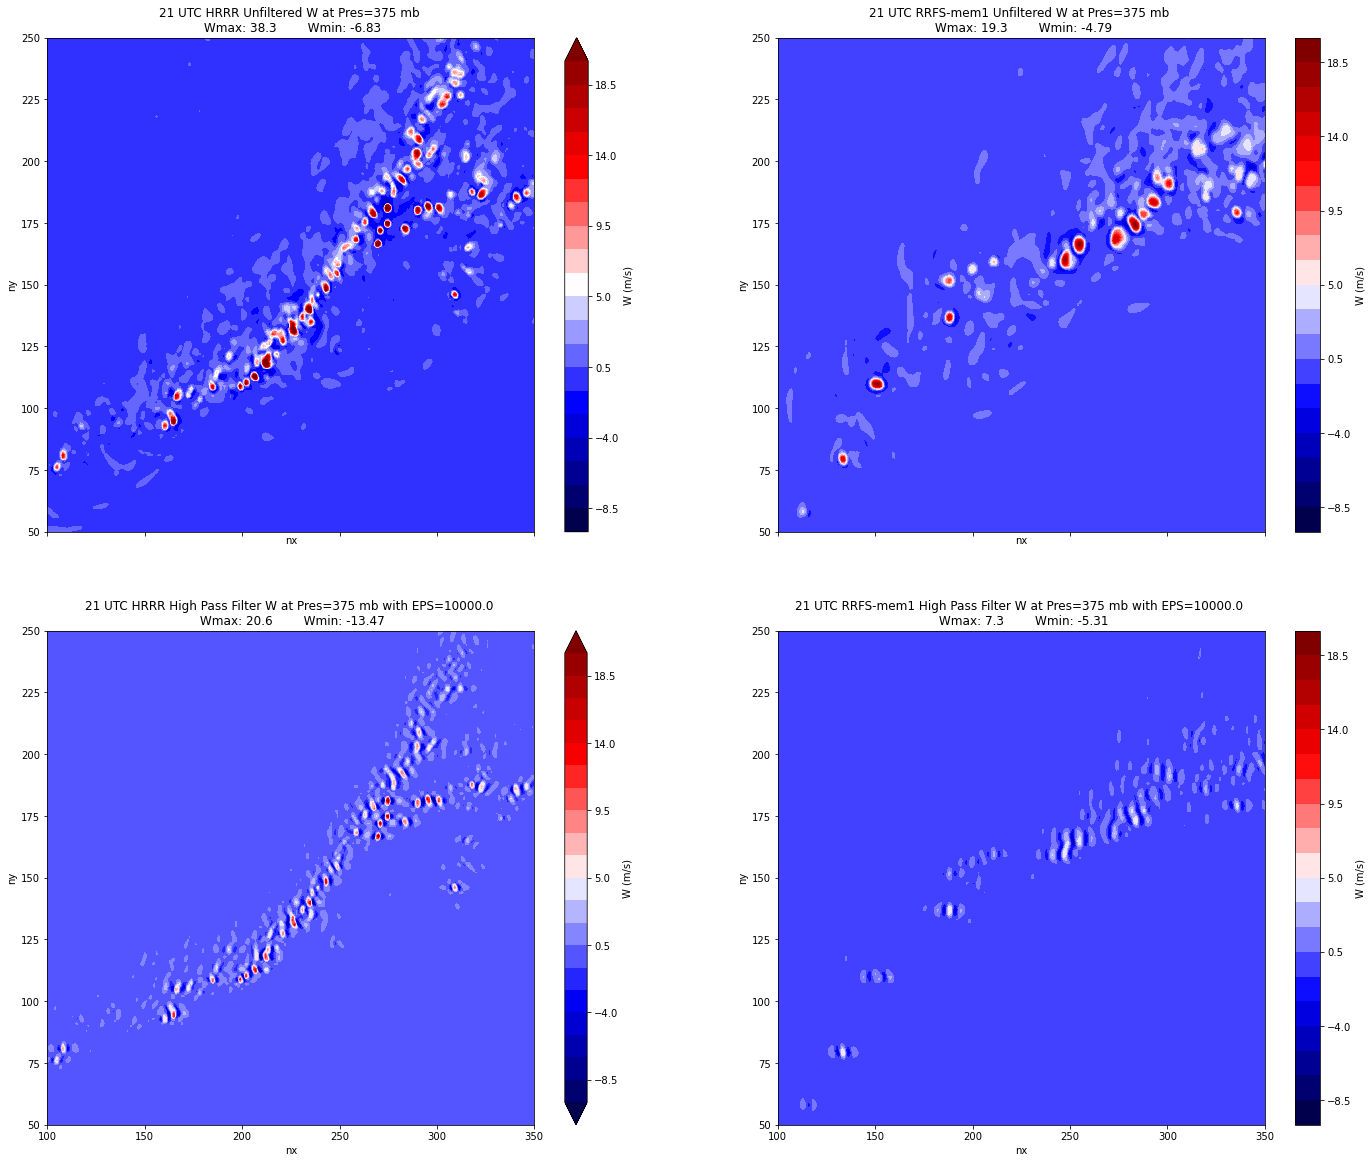

In [12]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(24,20), sharex=True)

# Plot the HRRR data

f.W.isel(nz=klevel).plot.contourf(ax=axes[0,0], levels=clevels, xlim=[100,350], ylim=[50,250], center=0.0, cmap='seismic', cbar_kwargs={'label': 'W (m/s)'})
axes[0,0].set_title(title_string(utc, plevel, 'HRRR Unfiltered W', f.W.isel(nz=klevel).max(), f.W.isel(nz=klevel).min()), fontsize=12)

fw_tmp2.isel(nz=klevel).plot.contourf(ax=axes[1,0], levels=clevels, xlim=[100,350], ylim=[50,250], center=0.0, cmap='seismic', cbar_kwargs={'label': 'W (m/s)'})
axes[1,0].set_title(title_string(utc, plevel, 'HRRR High Pass Filter W', fw_tmp2.isel(nz=klevel).max(),fw_tmp2.isel(nz=klevel).min(), eps=eps), fontsize=12)

g.W.isel(nz=klevel).plot.contourf(ax=axes[0,1], levels=clevels, xlim=[100,350], ylim=[50,250], center=0.0, cmap='seismic', cbar_kwargs={'label': 'W (m/s)'})
axes[0,1].set_title(title_string(utc, plevel, 'RRFS-mem1 Unfiltered W', g.W.isel(nz=klevel).max(), g.W.isel(nz=klevel).min()), fontsize=12)

gw_tmp2.isel(nz=klevel).plot.contourf(ax=axes[1,1], levels=clevels, xlim=[100,350], ylim=[50,250], center=0.0, cmap='seismic', cbar_kwargs={'label': 'W (m/s)'})
axes[1,1].set_title(title_string(utc, plevel, 'RRFS-mem1 High Pass Filter W', gw_tmp2.isel(nz=klevel).max(), gw_tmp2.isel(nz=klevel).min(), eps=eps),fontsize=12)
